In [143]:
from erpe.analysis import *
from erpe.models import *
from erpe.experiment_design import *

# autorload 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create an RPE experiment design

In [144]:
depths = [2**i for i in range(10)]
edesign_XI = EDesign_1QXI(depths, ['Q0'])
edesign_CZ = EDesign_CZ(depths, ['Q0', 'Q1'])

In [145]:
print(len(edesign_XI.circuit_list), len(edesign_CZ.circuit_list))

59 60


In [146]:
edesign_XI.germs

[Circuit(Gxpi2:Q0@(Q0)),
 Circuit(Gzpi2:Q0Gxpi2:Q0Gxpi2:Q0Gzpi2:Q0Gzpi2:Q0Gxpi2:Q0Gxpi2:Q0Gzpi2:Q0@(Q0)),
 Circuit(Gi:Q0@(Q0))]

In [147]:
edesign_CZ.germs

[Circuit(Gcz:Q0:Q1@(Q0,Q1))]

# Create a model and simulate data

In [157]:
xvec = np.array([0.1, 0.2, 0.3])
model_1Q = create_XI_model_1q(xvec, qid='Q0')
model_2Q = create_CZ_model(xvec)
model_1Q_target = create_XI_model_1q(np.zeros(3), qid='Q0')
model_2Q_target = create_CZ_model(np.zeros(3))


In [158]:
num_shots = 1000
ds_XI = edesign_XI.make_dataset(model_1Q, num_shots)
ds_CZ = edesign_CZ.make_dataset(model_2Q, num_shots)

# Analyze data

In [161]:
analysis_cz = Analysis_CZ(ds_CZ, edesign_CZ)
analysis_xi = Analysis_XI(ds_XI, edesign_XI)

In [151]:
analysis_cz.raw_estimates

{Circuit(Gcz:Q0:Q1@(Q0,Q1)): {'0+': array([0.35687987, 0.39758038, 0.38969923, 0.39994097, 0.40023806,
         0.39947844, 0.39936251, 0.40020348, 0.40007476, 0.40007643]),
  '1+': array([2.91643731, 2.94948831, 2.94524311, 2.94849238, 2.94274444,
         2.94174376, 2.94206062, 2.94198996, 2.9416685 , 2.94156133]),
  '+1': array([3.10145358, 3.02587601, 3.04582339, 3.0375876 , 3.04241797,
         3.04073163, 3.04169577, 3.04143661, 3.04152359, 3.04160129])}}

In [152]:
analysis_xi.estimates

{'X overrot': 0.1571878887517819,
 'X axis': 0.21142898325286805,
 'idle': 0.30022041102704833}

In [153]:
analysis_cz.estimates

{'IZ': 0.10002255298283913,
 'ZI': 0.20006252057358598,
 'ZZ': 0.30005388102002684}

# Display counts

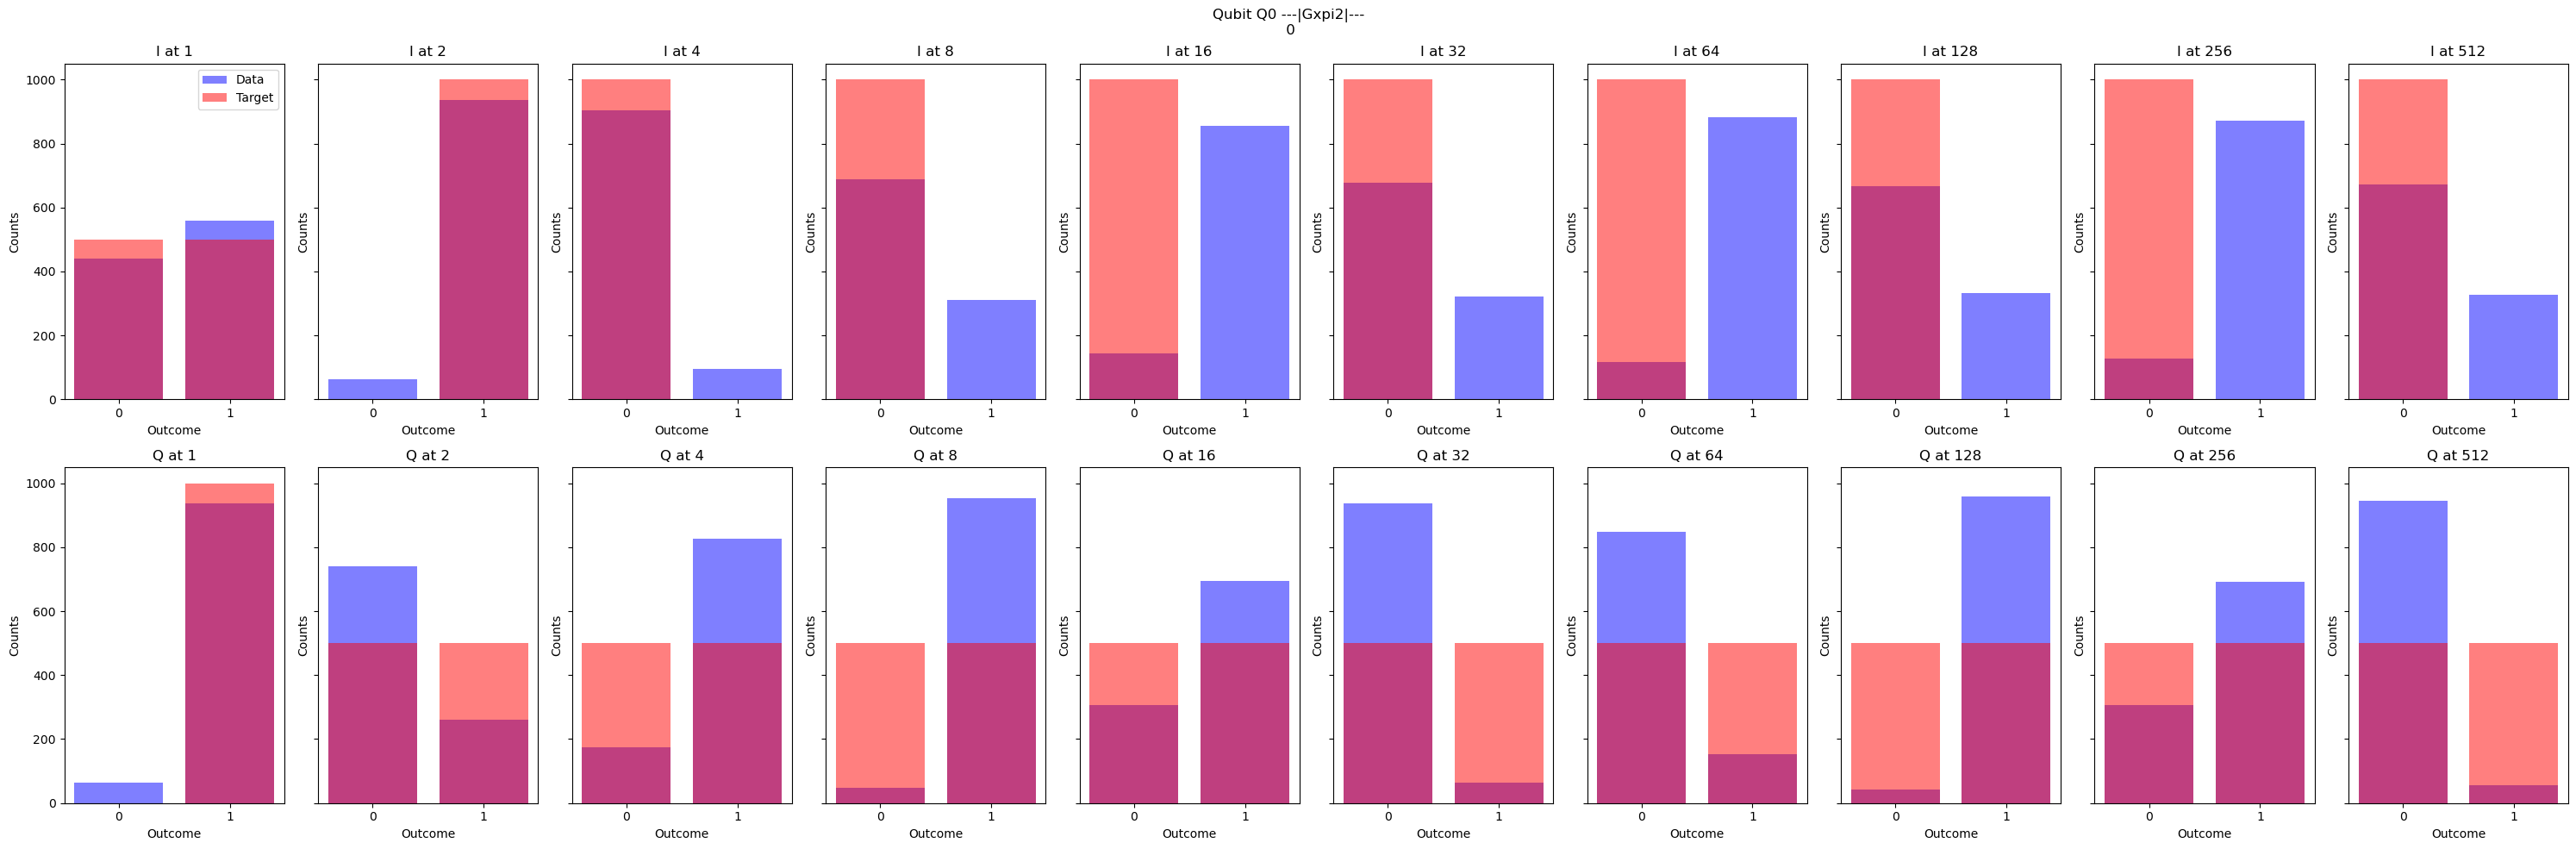

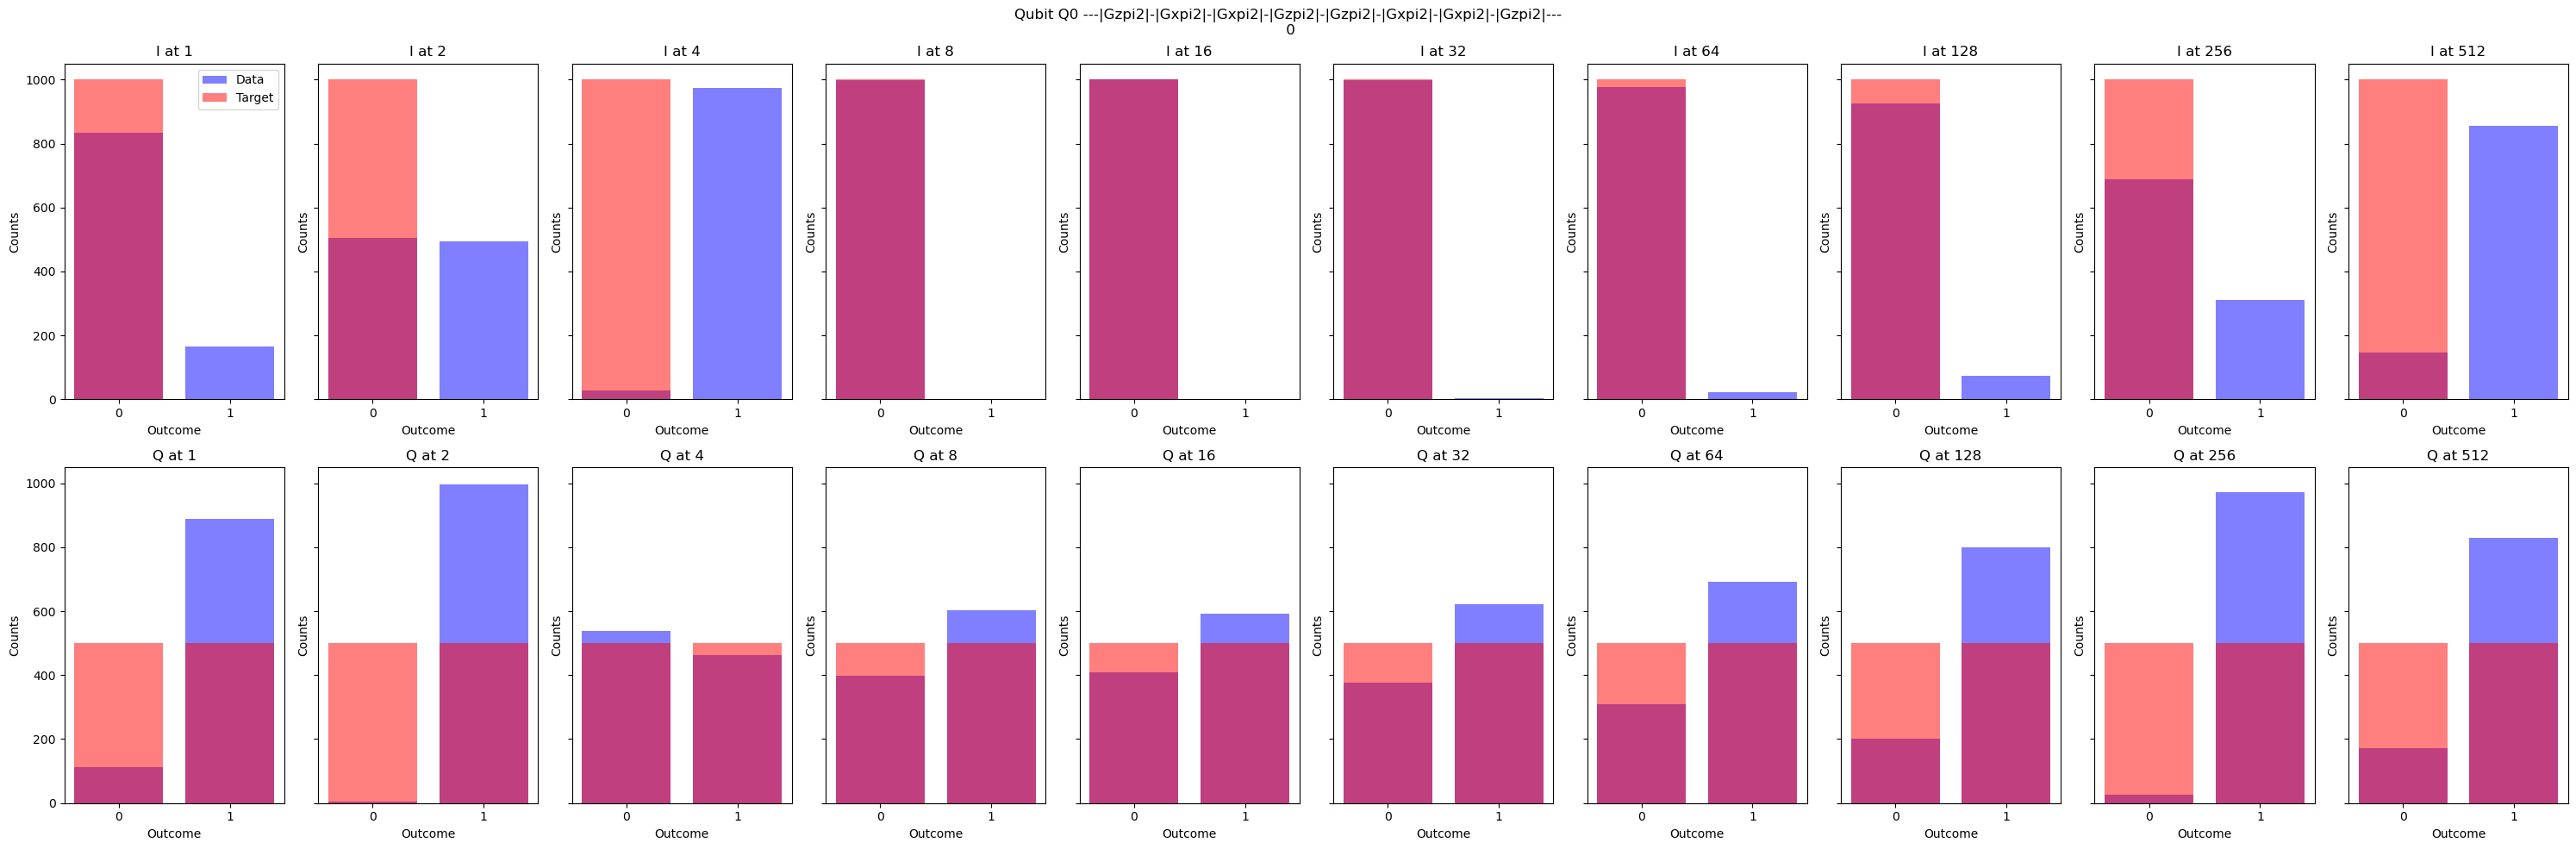

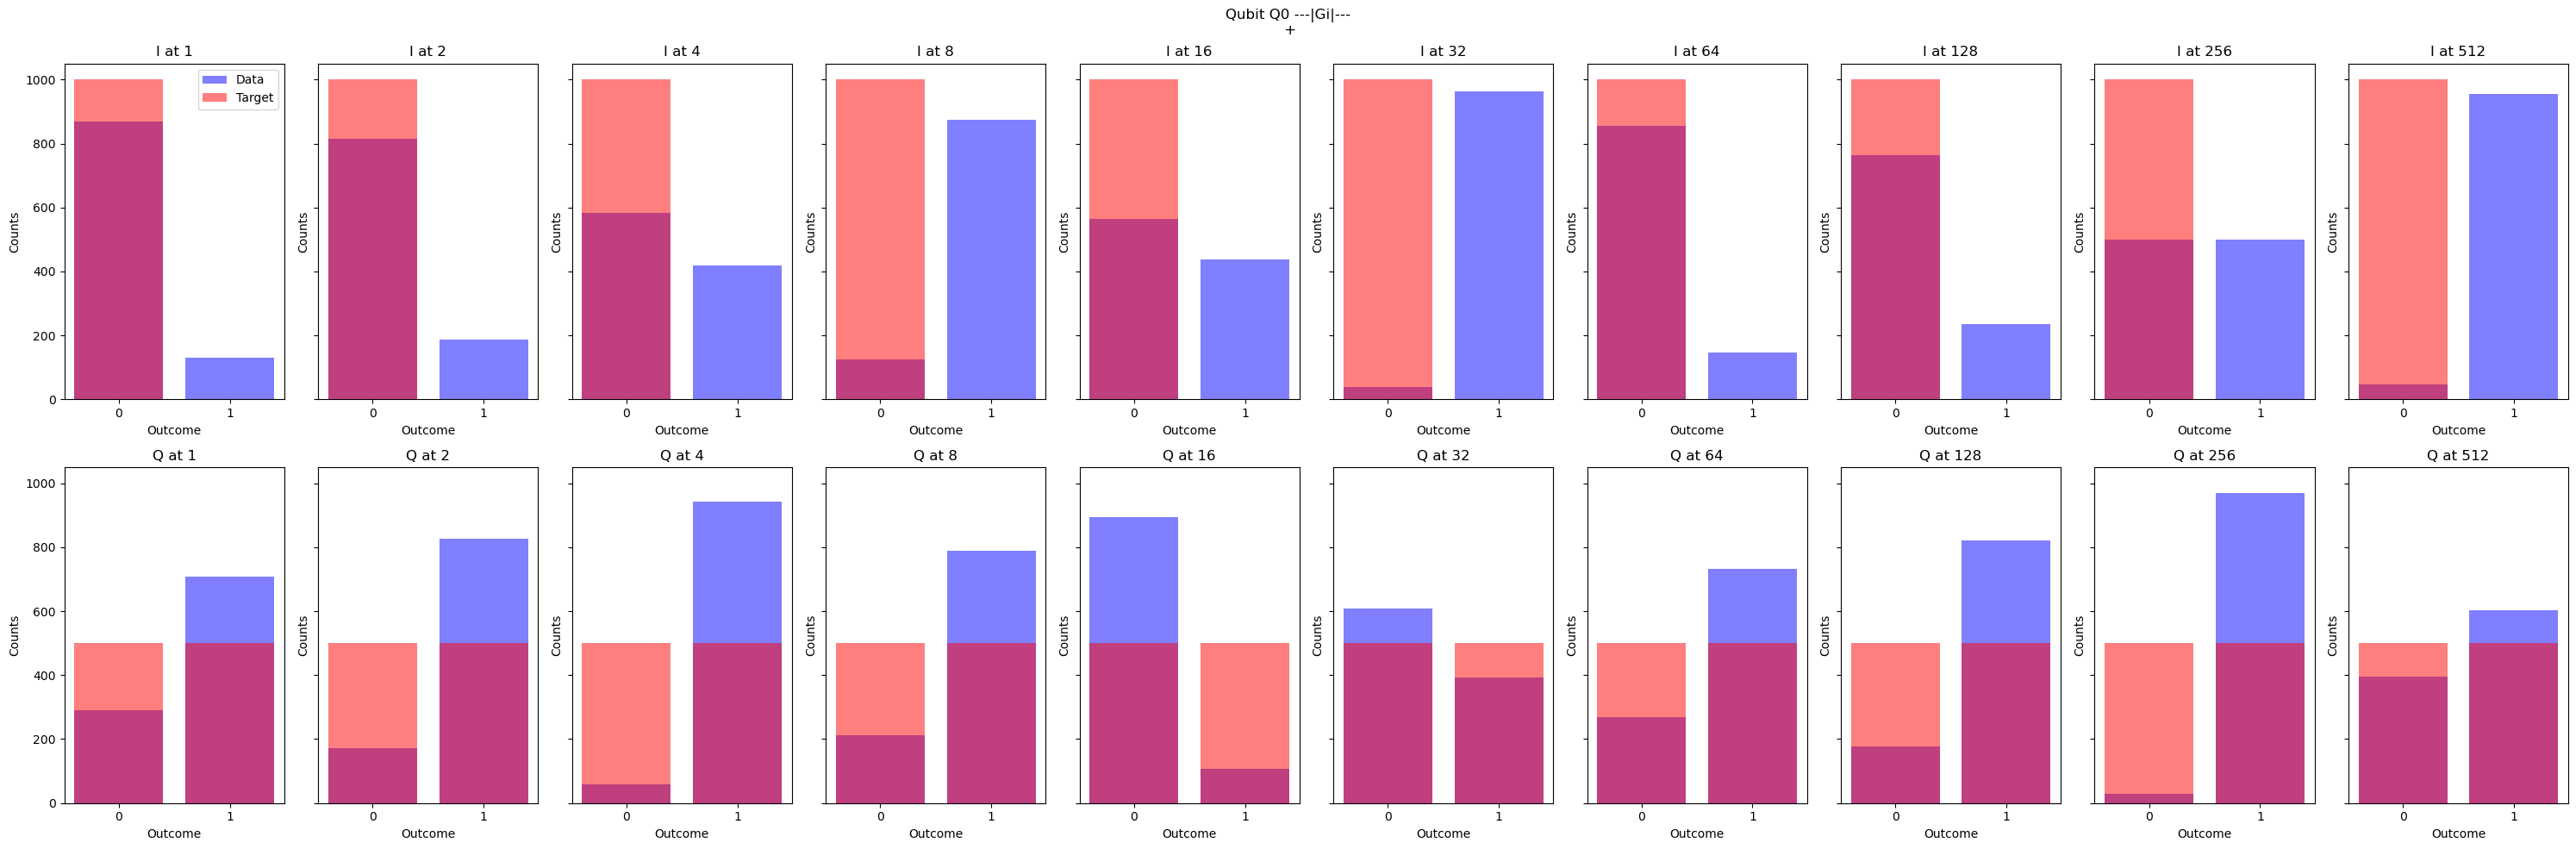

In [154]:
analysis_xi.plot_dataset(model_1Q_target)

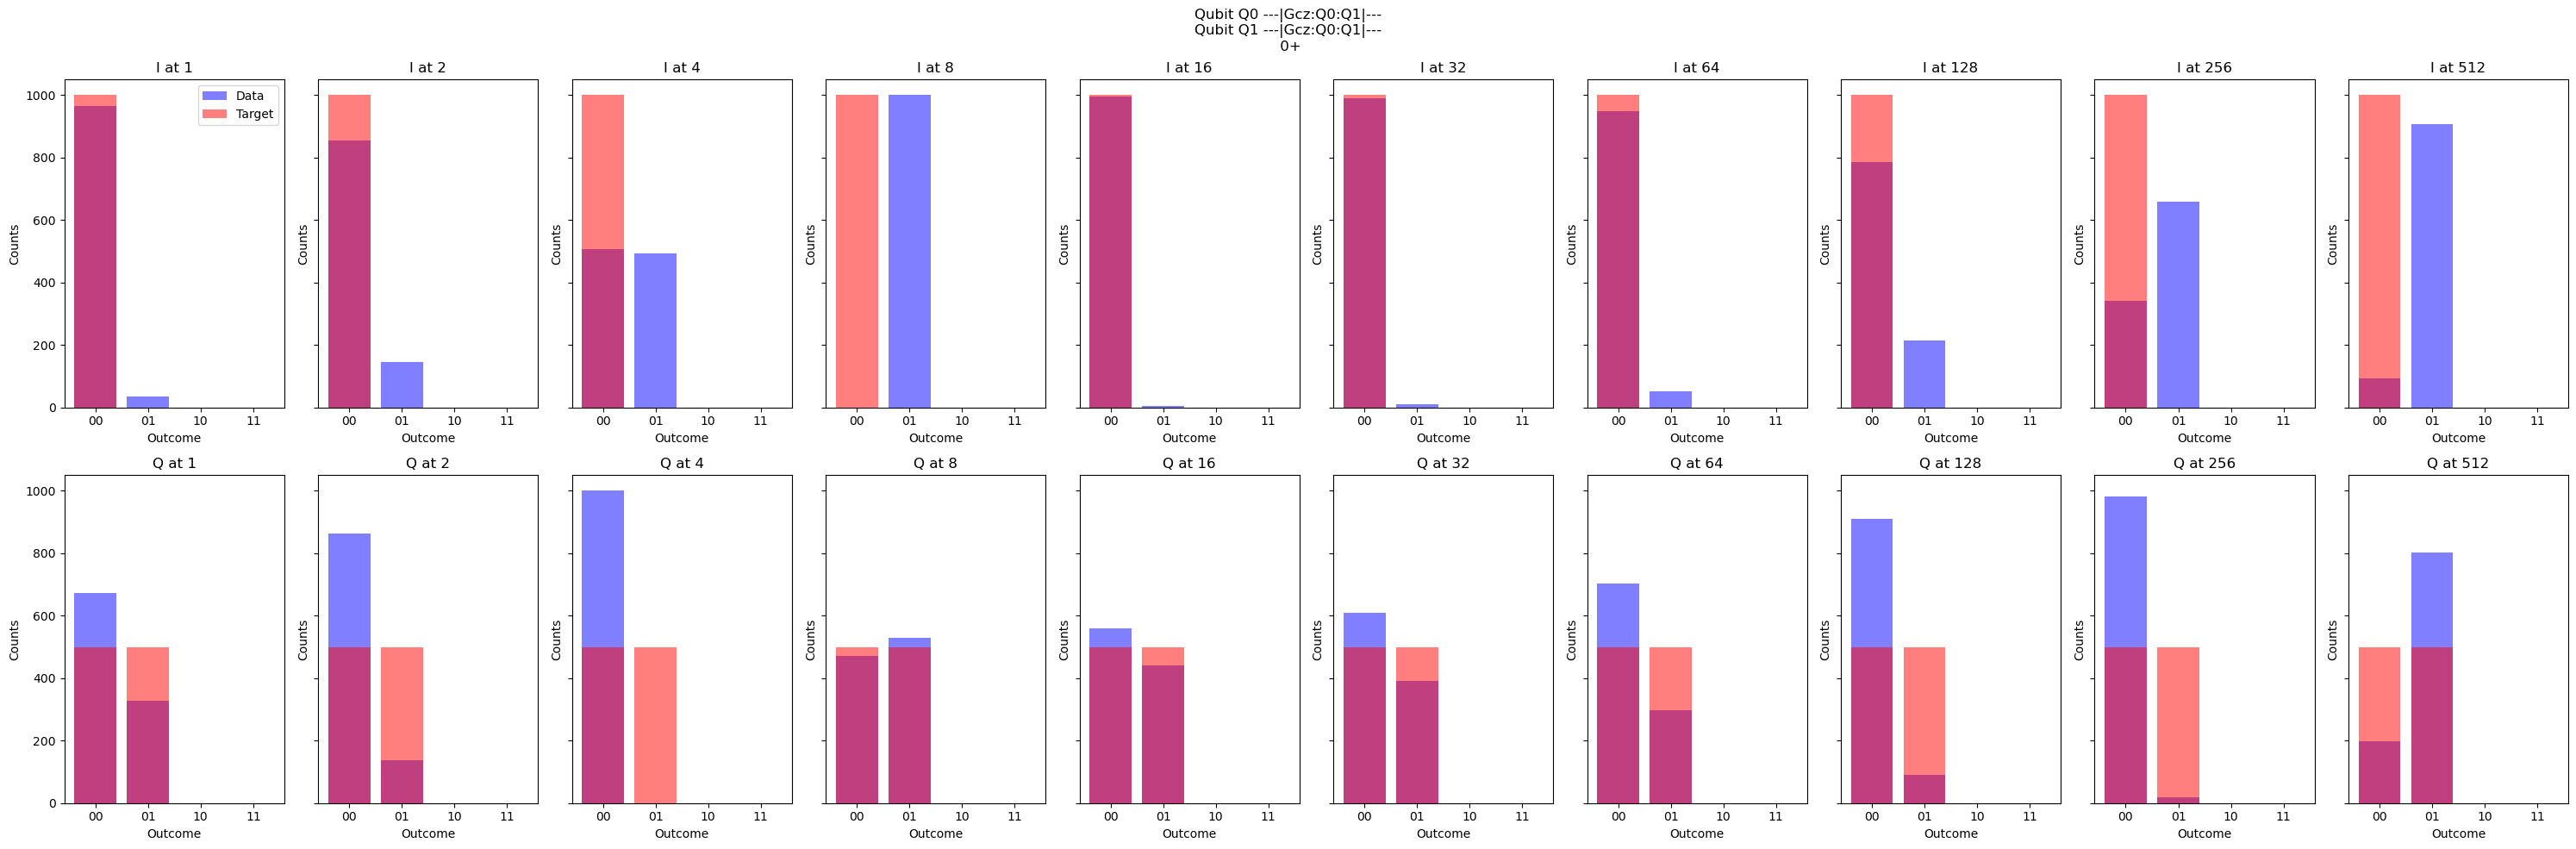

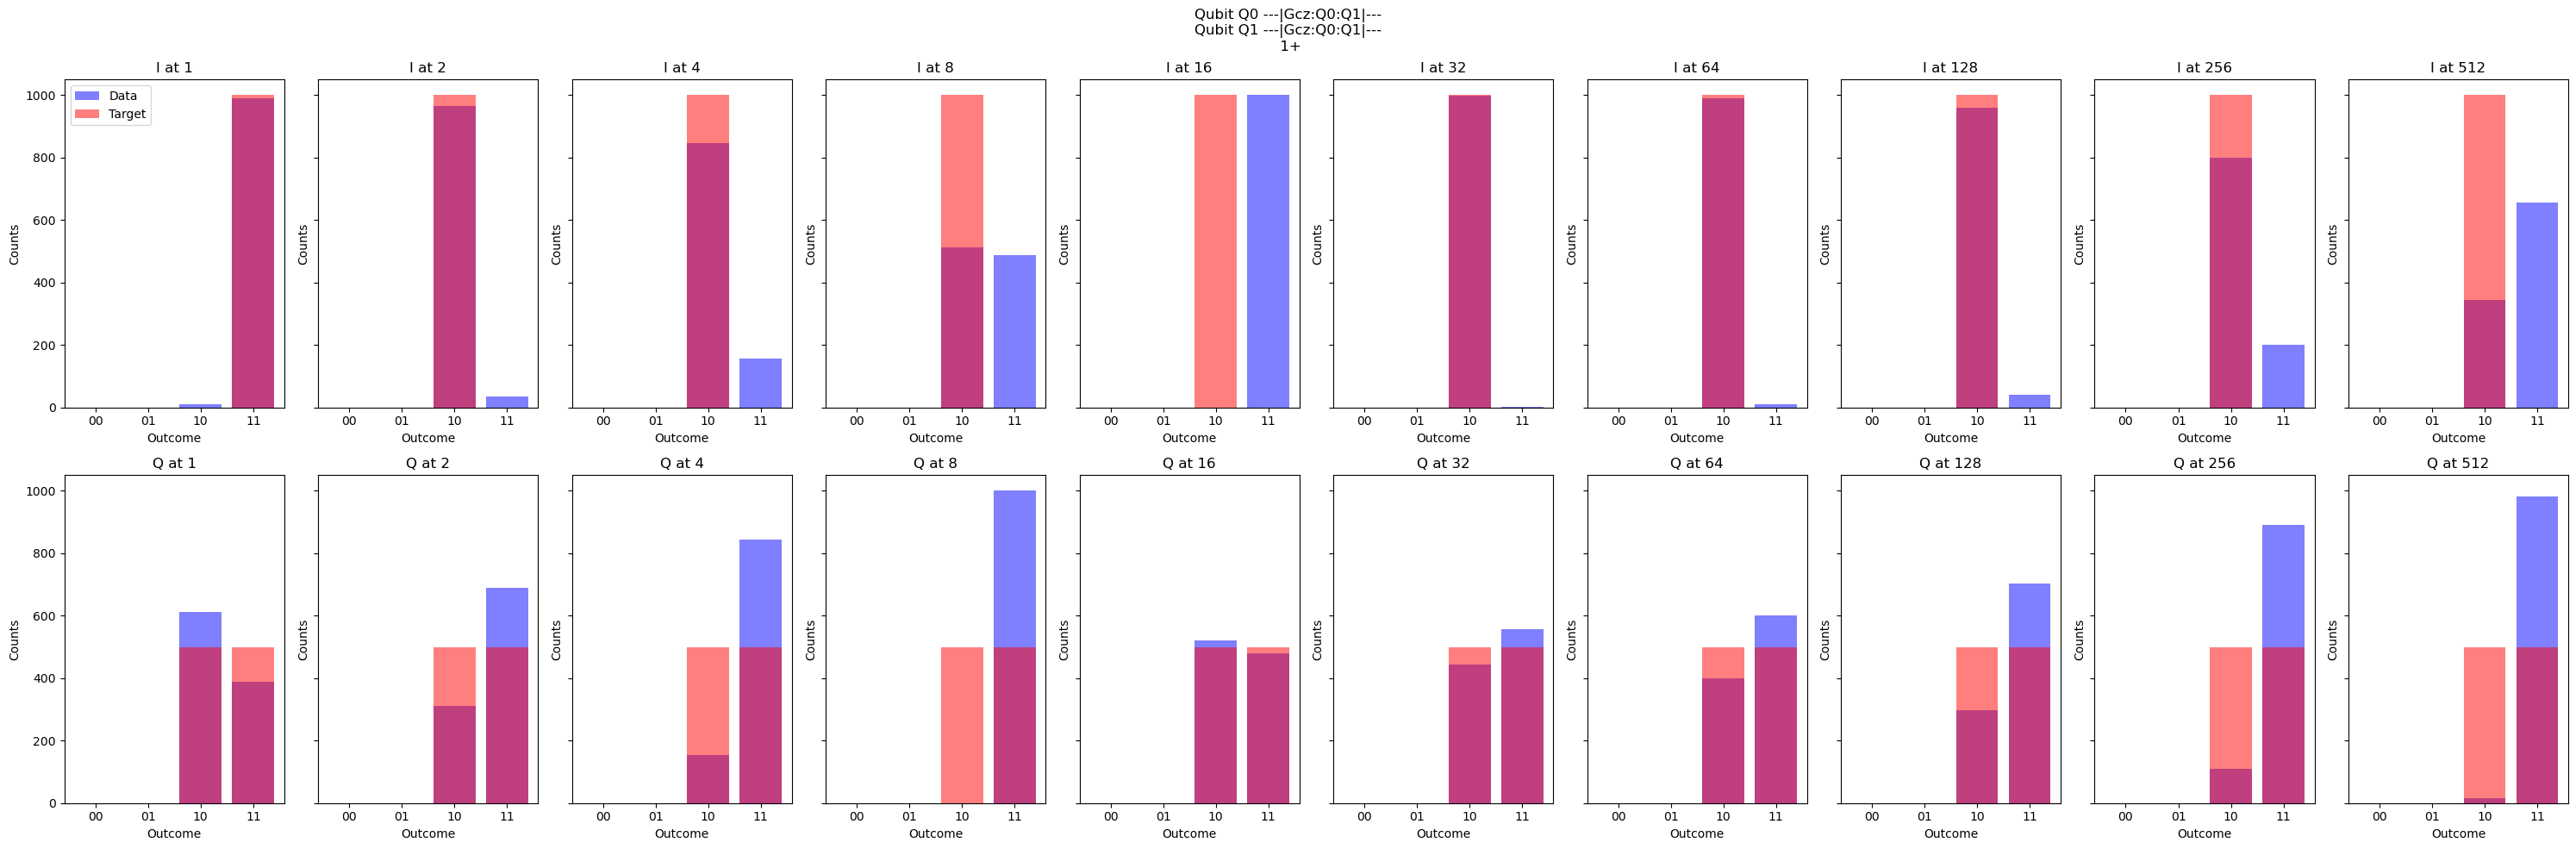

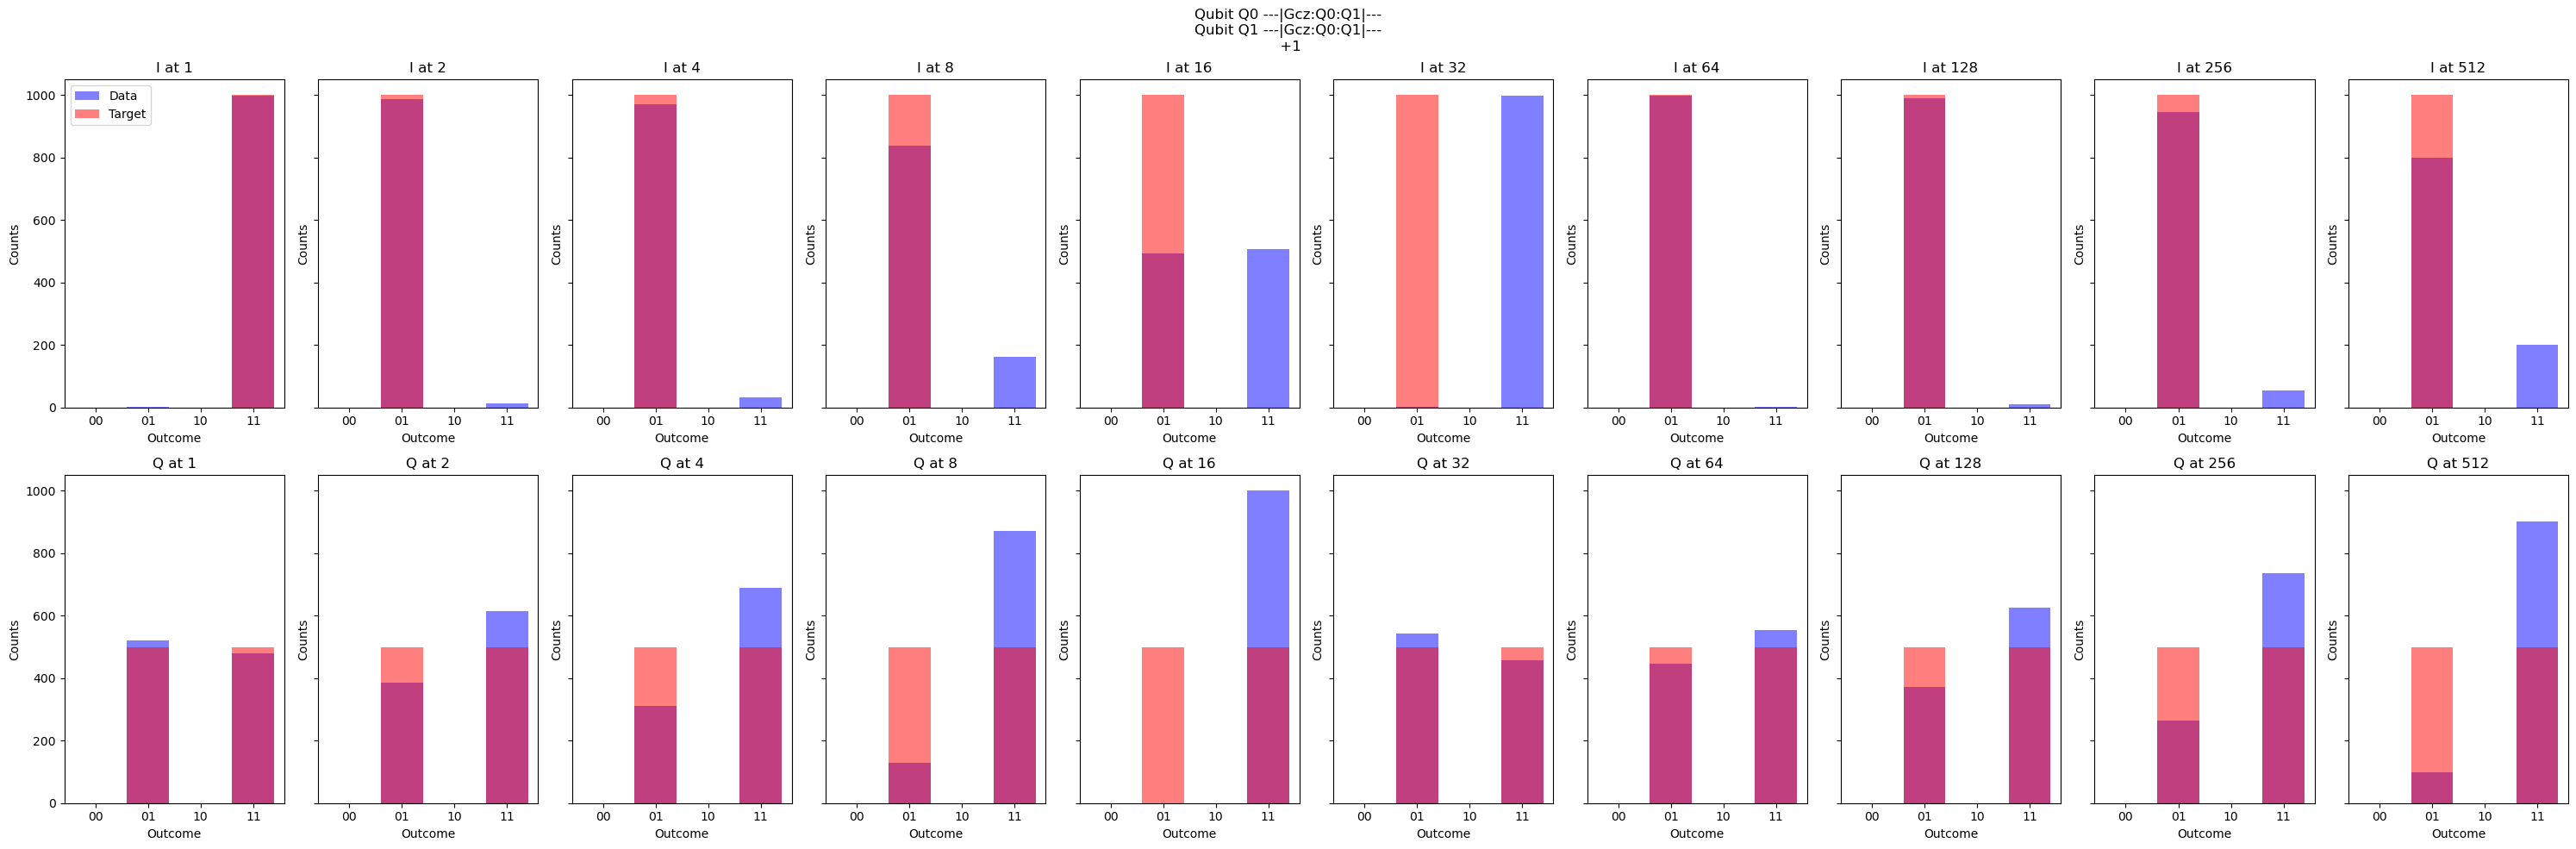

In [155]:
analysis_cz.plot_dataset(target_model=model_2Q_target)

# Plot Signals

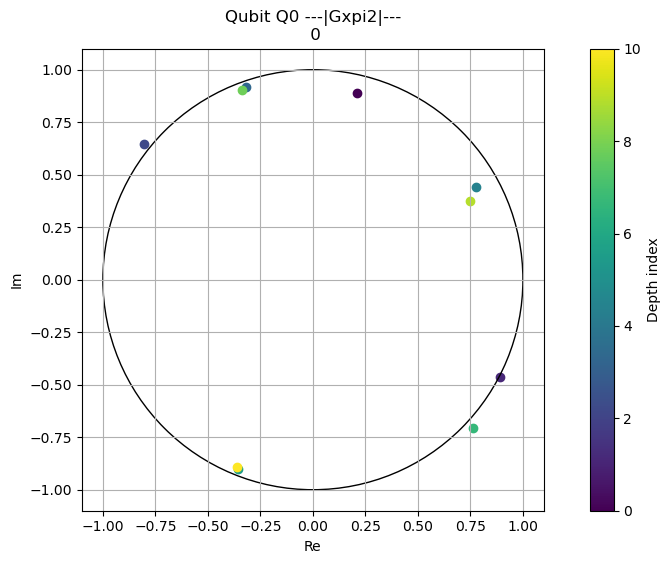

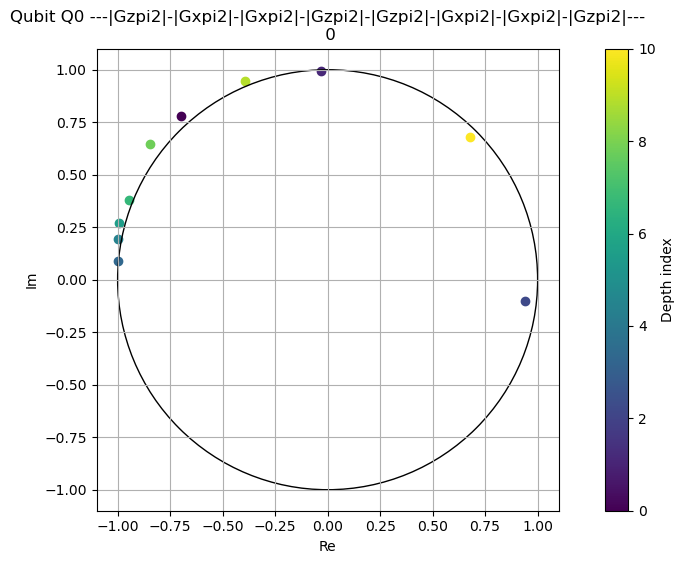

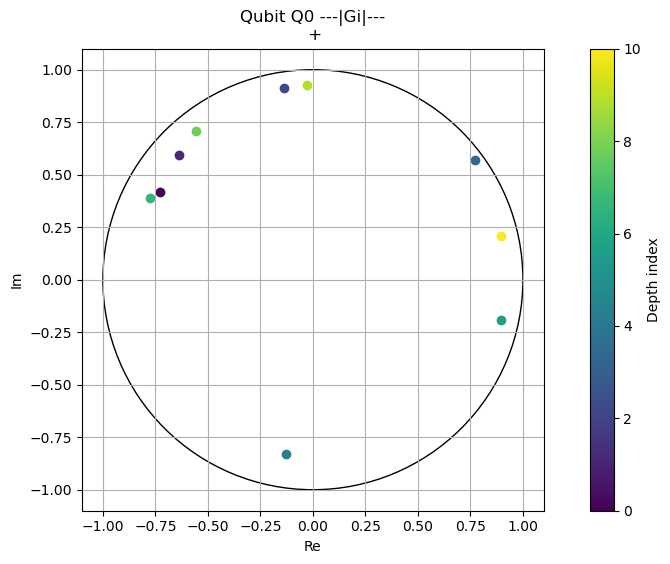

In [163]:
analysis_xi.plot_all_signals()

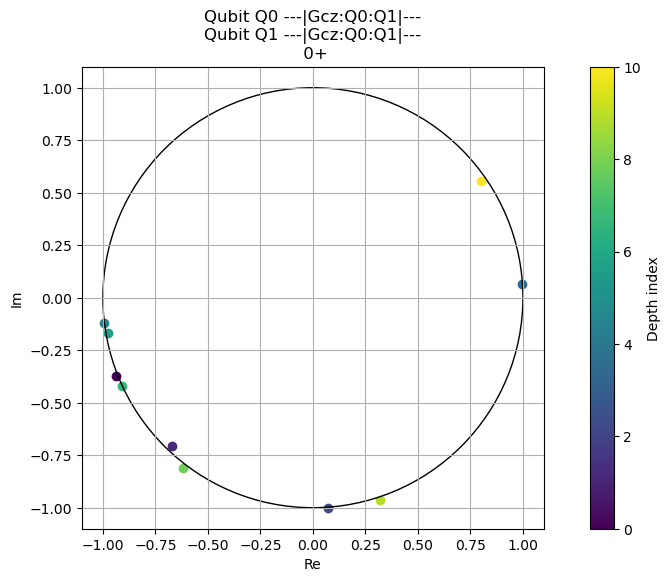

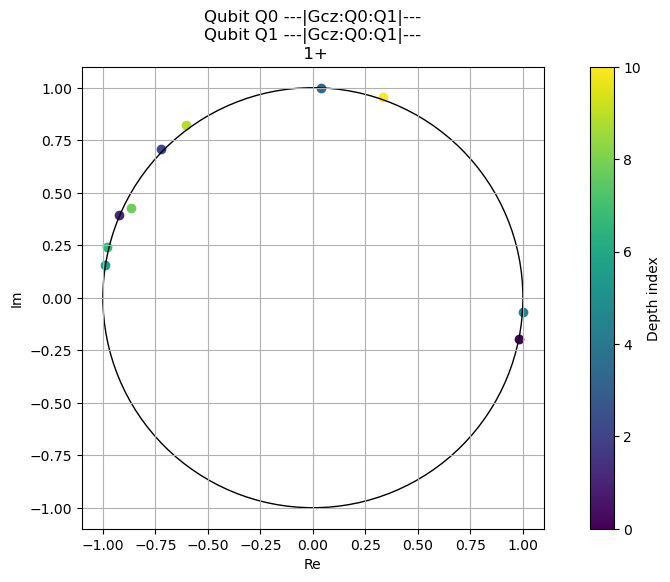

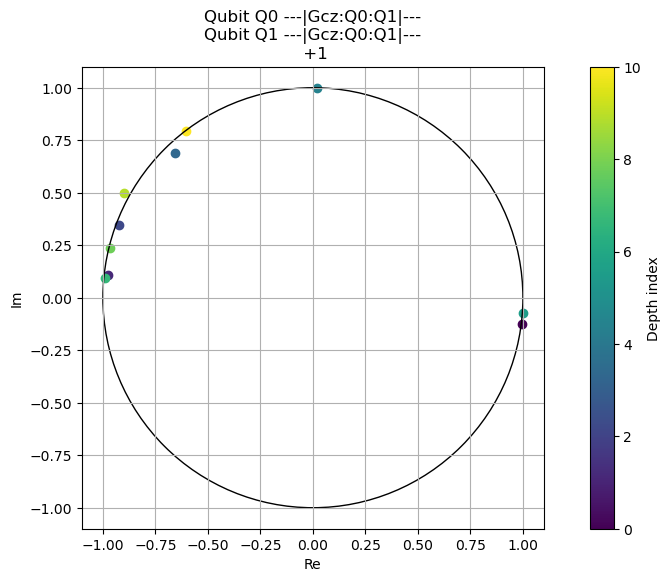

In [164]:
analysis_cz.plot_all_signals()